# <font color='black'>**Seleção e agrupamento de dados com pandas**</font>

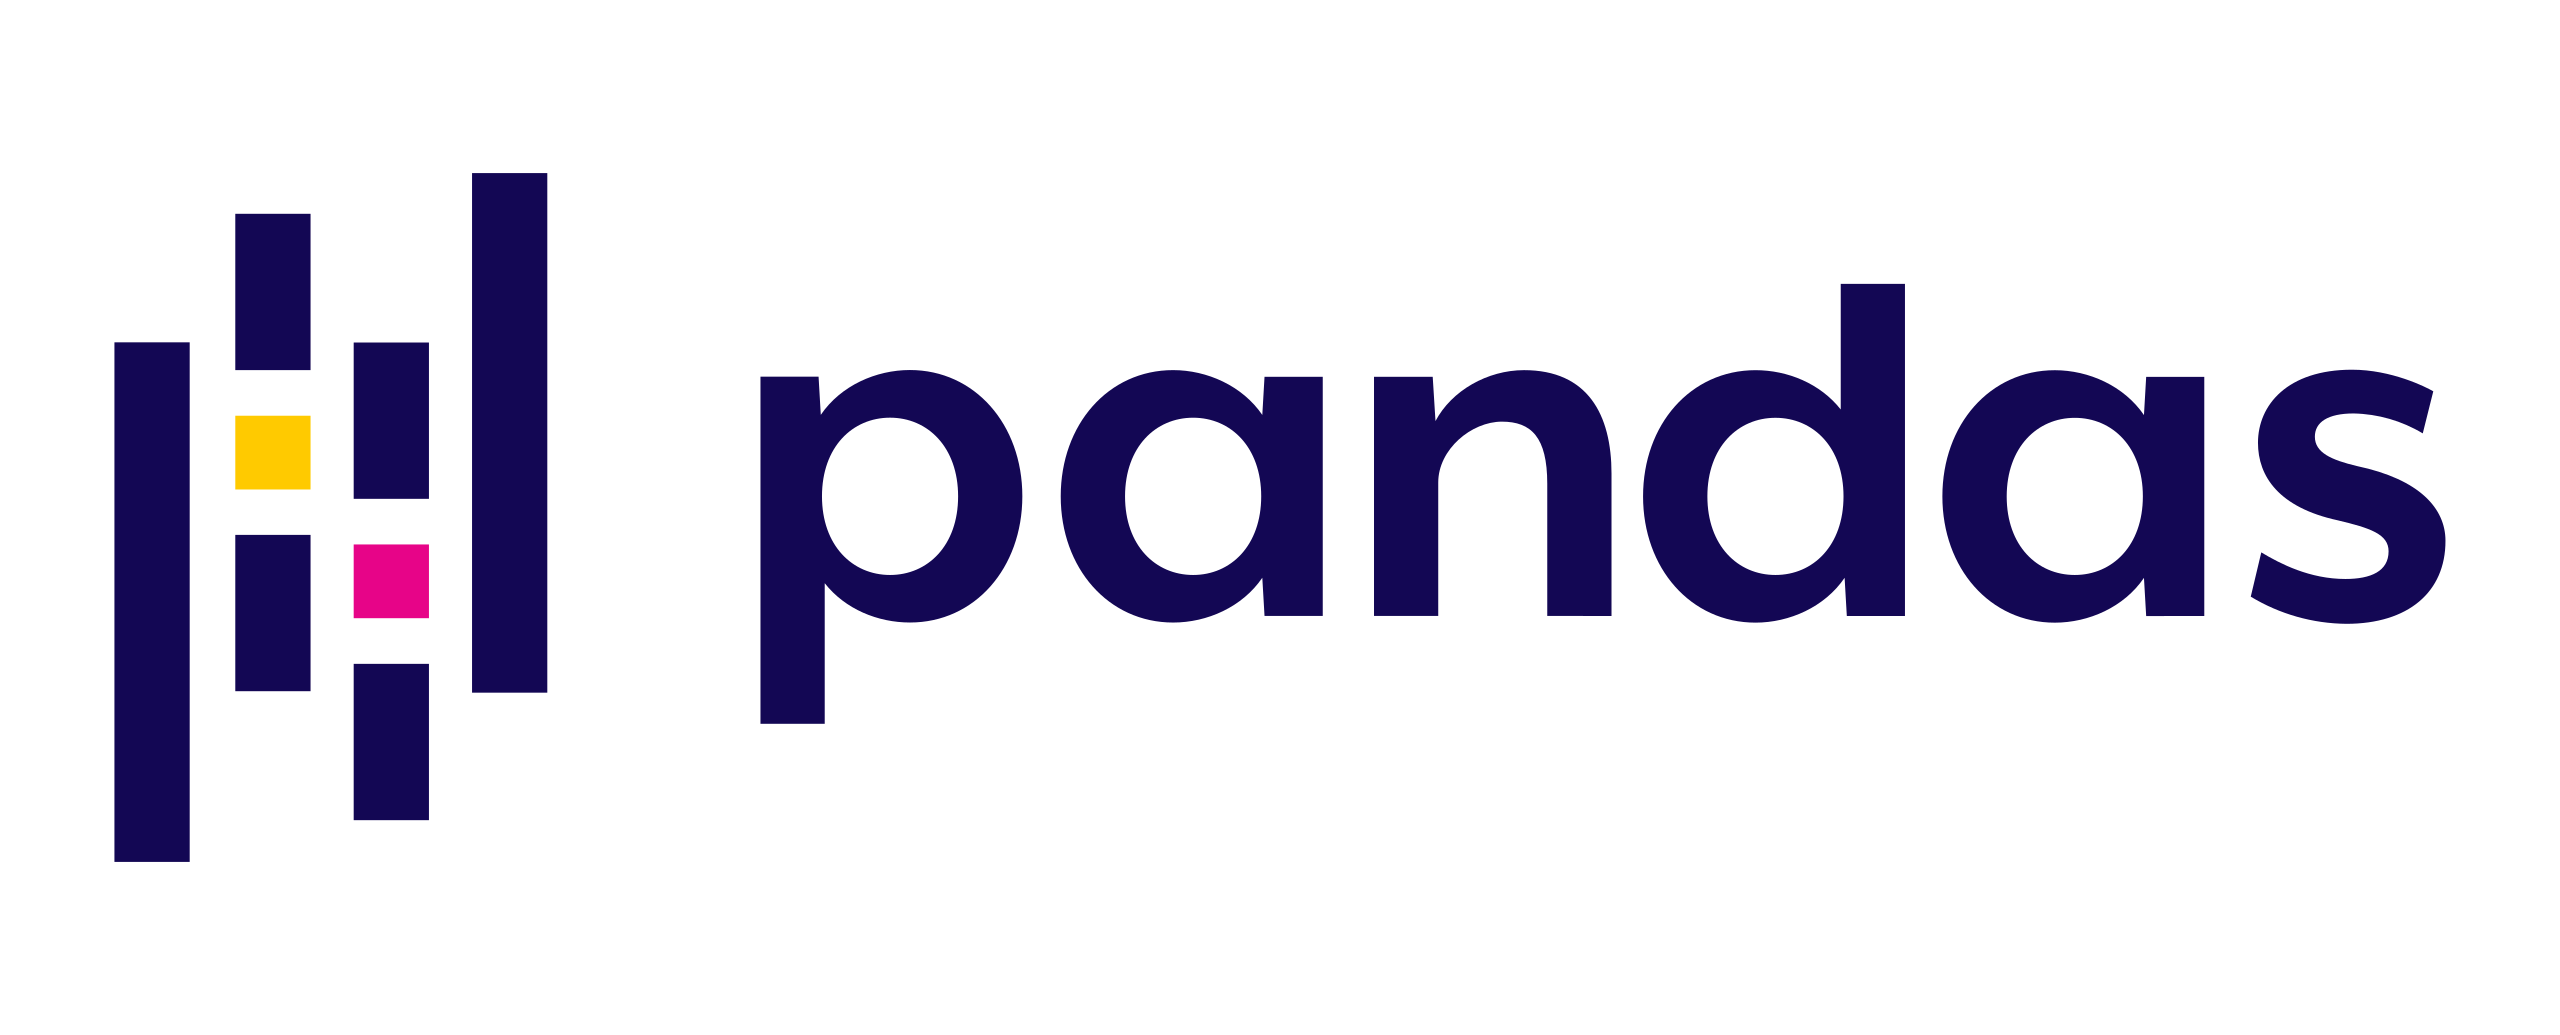

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
# Import da biblioteca para análise de dados
import pandas as pd

In [2]:
# Leitura do arquivo excel para um Dataframe, com base na planilha GEE Estados
df = pd.read_excel('dados_seeg_2022.xlsx', sheet_name='GEE Estados')

C:\Users\gabri\anaconda3\envs\teste_jupyter_version\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [4]:
df.columns

Index([           'Nível 1 - Setor',                    'Nível 2',
                          'Nível 3',                    'Nível 4',
                          'Nível 5',                    'Nível 6',
       'Emissão / Remoção / Bunker',                        'Gás',
                           'Estado',        'Atividade Econômica',
                          'Produto',                         1970,
                               1971,                         1972,
                               1973,                         1974,
                               1975,                         1976,
                               1977,                         1978,
                               1979,                         1980,
                               1981,                         1982,
                               1983,                         1984,
                               1985,                         1986,
                               1987,                         1

Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [6]:
# Valores únicos
df['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [7]:
# Gases presentes:
df['Gás'].unique()

array(['COVNM (t)', 'N2O (t)', 'CO (t)', 'NOx (t)', 'CO2e (t) GWP-AR2',
       'CO2e (t) GTP-AR2', 'CO2 (t)', 'CH4 (t)', 'CF4 (t)', 'C2F6 (t)',
       'SF6 (t)', 'HFC-23 (t)', 'HFC-32 (t)', 'HFC-134a (t)',
       'HFC-125 (t)', 'HFC-143a (t)', 'HFC-152a (t)', 'CO2e (t) GWP-AR4',
       'CO2e (t) GTP-AR4', 'CO2e (t) GWP-AR5', 'CO2e (t) GTP-AR5',
       'CO2e (t) GWP-AR6', 'CO2e (t) GTP-AR6'], dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [8]:
# Filtrando dados de remoção
remocao = df.query('`Emissão / Remoção / Bunker` == "Remoção" or `Emissão / Remoção / Bunker` == "Remoção NCI"')
remocao

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores de remoção são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [9]:
# Localizando o valor máximo de remoção de todas as colunas numéricas para verificar se todas são negativas
remocao.loc[:, 1970:2021].max() 

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

- Comparação da quantidade de registros de retirada de gases de efeito estufa e de outros gases:

In [10]:
# Criaçao de array de gases de efeito estufa a partir dos gases presentes na base de dados:
# Lista de gases de efeito estufa
from numpy import array

gases_efeito_estufa = array(['N2O (t)', 'CO2 (t)', 'CH4 (t)', 'CF4 (t)', 'C2F6 (t)', 'SF6 (t)', 
                       'HFC-23 (t)', 'HFC-32 (t)', 'HFC-134a (t)', 'HFC-125 (t)', 
                       'HFC-143a (t)', 'HFC-152a (t)'])
gases_efeito_estufa

array(['N2O (t)', 'CO2 (t)', 'CH4 (t)', 'CF4 (t)', 'C2F6 (t)', 'SF6 (t)',
       'HFC-23 (t)', 'HFC-32 (t)', 'HFC-134a (t)', 'HFC-125 (t)',
       'HFC-143a (t)', 'HFC-152a (t)'], dtype='<U12')

In [11]:
# Verificando se todos são de retirada de gases de efeito estufa
qtd_registros_remocao = remocao.shape[0]

remocao_gases_efeito_estufa = remocao.query('Gás in @gases_efeito_estufa')
qtd_registros_remocao_gases_efeito_estufa = remocao_gases_efeito_estufa.shape[0]

percentual_gee = (qtd_registros_remocao_gases_efeito_estufa / qtd_registros_remocao) * 100
percentual_og = ((qtd_registros_remocao - qtd_registros_remocao_gases_efeito_estufa) / qtd_registros_remocao) * 100

print("Quantidade de registros com retirada de gases: ", qtd_registros_remocao)
print("Quantidade de registros com retirada de gases de efeito estufa: ", qtd_registros_remocao_gases_efeito_estufa)
print("Quantidade de registros com retirada de outros gases: ", qtd_registros_remocao - qtd_registros_remocao_gases_efeito_estufa)
print(f"\nPercentual:\nGases Efeito Estufa: {percentual_gee:.2f}%\nOutros Gases: {percentual_og:.2f}%")

Quantidade de registros com retirada de gases:  7970
Quantidade de registros com retirada de gases de efeito estufa:  884
Quantidade de registros com retirada de outros gases:  7086

Percentual:
Gases Efeito Estufa: 11.09%
Outros Gases: 88.91%


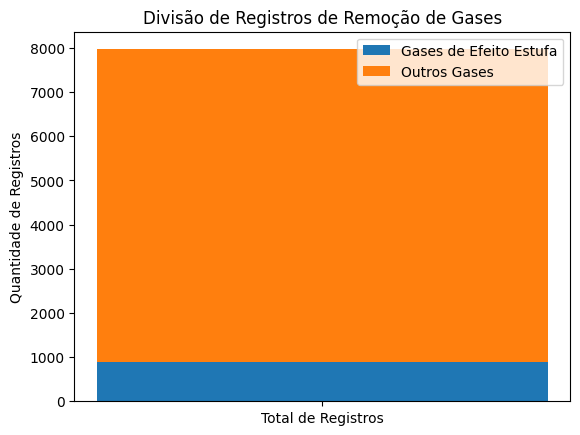

In [12]:
# Visualização gráfica da diferença

from matplotlib import pyplot as plt

# Dados
total_registros = qtd_registros_remocao
gases_efeito_estufa = qtd_registros_remocao_gases_efeito_estufa
outros_gases = total_registros - gases_efeito_estufa

# Criando o gráfico de barras empilhadas
fig, ax = plt.subplots()

ax.bar('Total de Registros', gases_efeito_estufa, label='Gases de Efeito Estufa')
ax.bar('Total de Registros', outros_gases, bottom=gases_efeito_estufa, label='Outros Gases')

# Adicionando legendas e título
ax.set_ylabel('Quantidade de Registros')
ax.set_title('Divisão de Registros de Remoção de Gases')
ax.legend()

# Exibindo o gráfico
plt.show()

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [13]:
bunker = df.query('`Emissão / Remoção / Bunker` == "Bunker"')
bunker['Estado'].unique() #Indica se há ou não alguma emissao derivada de um estado

array([nan], dtype=object)

Trabalharemos apenas com os registros de emissão

In [14]:
emissoes = df.query('`Emissão / Remoção / Bunker` == "Emissão"')
emissoes.reset_index(drop=True, inplace=True) # Configurando índices para ordenação habitual
emissoes

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94743,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
94744,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
94745,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
94746,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [15]:
emissoes = emissoes.drop(columns='Emissão / Remoção / Bunker')
emissoes

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94743,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
94744,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
94745,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
94746,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [16]:
# Registrando nomes das colunas com valores atemporais
colunas_info = emissoes.loc[:, 'Nível 1 - Setor': 'Produto'].columns
colunas_info = array(colunas_info)

colunas_info

array(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype=object)

In [17]:
# Registrando colunas com dados temporais
colunas_temporais = emissoes.loc[:, 1970:2021].columns
colunas_temporais = array(colunas_temporais)

colunas_temporais

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=object)

In [18]:
# Alterando dimensionamento da base de dados
emissoes = emissoes.melt(id_vars=colunas_info, value_vars=colunas_temporais, var_name='Ano', value_name='Emissão')

In [19]:
emissoes

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [20]:
# Agrupamento de quantidade total de emissão por tipo de gás, ordenando descrescentemente
total_gas = emissoes.groupby('Gás')[['Emissão']].sum().sort_values(by='Emissão', ascending=False)

total_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: title={'center': 'Quantidade de Emissão Total por Gás (1970 - 2021)'}, ylabel='Gás'>

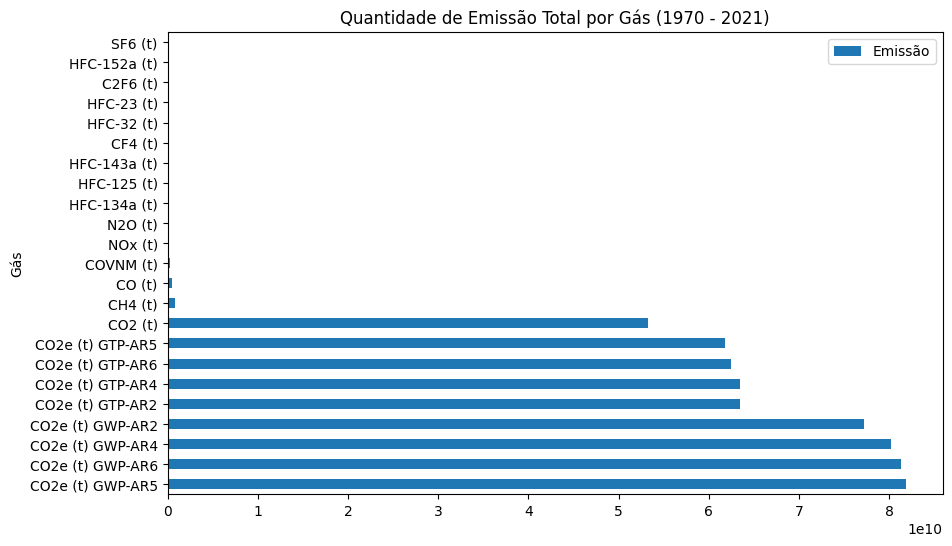

In [21]:
# Plotando a quantidade de emissão total por tipo de gás:
total_gas.plot(kind='barh', figsize=(10, 6), title='Quantidade de Emissão Total por Gás (1970 - 2021)')

In [23]:
# Calculando a proporção da emissão dos gases de CO2:
# Separando dados de emissao de gases
emissao_co2 = total_gas.iloc[0:9, :]

# Somando quantidade de emissao
qtd_emissao_co2 = emissao_co2['Emissão'].sum()

# Calculando percentual em relação a quantidade total
total = total_gas['Emissão'].sum()
qtd_emissao_co2 = (qtd_emissao_co2 / total) * 100

print("Percentual de emissão de gases de CO2 (1970-2021): ", round(qtd_emissao_co2,2), "%")

Percentual de emissão de gases de CO2 (1970-2021):  99.74 %


### Emissão de gases por setor

- Descobrir quais são os setores mais poluentes para cada gás;

In [24]:
# Agrupamentos por total de emissão por tipo de gás e setor
gas_setor = emissoes.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()

# Índices dos setores mais poluentes (Com maior total de emissão) por gás
indices_setores_mais_poluentes = gas_setor['Emissão'].groupby(level=0).idxmax()

# Localização dos registros dentro do agrupamento
setores_mais_poluentes = gas_setor.loc[indices_setores_mais_poluentes]

setores_mais_poluentes.sort_values(by='Emissão', ascending=False)

,,Emissão
Gás,Nível 1 - Setor,
CO2e (t) GWP-AR5,Mudança de Uso da Terra e Floresta,4.051523e+10
CO2e (t) GWP-AR6,Mudança de Uso da Terra e Floresta,4.049216e+10
CO2e (t) GWP-AR4,Mudança de Uso da Terra e Floresta,4.030837e+10
CO2e (t) GWP-AR2,Mudança de Uso da Terra e Floresta,3.999424e+10
CO2e (t) GTP-AR2,Mudança de Uso da Terra e Floresta,3.850044e+10
CO2e (t) GTP-AR4,Mudança de Uso da Terra e Floresta,3.850044e+10
CO2e (t) GTP-AR6,Mudança de Uso da Terra e Floresta,3.843359e+10
CO2e (t) GTP-AR5,Mudança de Uso da Terra e Floresta,3.831675e+10
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


- Descobrir quais são os gases mais poluentes para cada setor.

In [25]:
# Índices dos gases mais poluentes (com maior total de emissão) por setor
indices_gases_mais_poluentes = gas_setor['Emissão'].groupby(level=1).idxmax()

# Localização dos registros dentro do agrupamento
gases_mais_poluentes = gas_setor.loc[indices_gases_mais_poluentes]

gases_mais_poluentes.sort_values(by='Emissão', ascending=False)

Emissão
Gás              Nível 1 - Setor                                 
CO2e (t) GWP-AR5 Mudança de Uso da Terra e Floresta  4.051523e+10
                 Agropecuária                        2.184388e+10
CO2e (t) GWP-AR6 Energia                             1.385259e+10
                 Processos Industriais               3.352064e+09
CO2e (t) GWP-AR5 Resíduos                            2.310099e+09

Descobrindo setores com maiores quantidades de emissão de CO2

In [26]:
# Trabalhando com multi index e cross section
gas_setor.xs('CO2 (t)', level=0).sort_values(by='Emissão', ascending=False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.733930e+10
Energia,1.261352e+10
Processos Industriais,2.729603e+09
Agropecuária,5.411750e+08
Resíduos,2.276264e+07


### Emissão ao longo dos anos

Vamos identificar se as médias de emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [27]:
# Agrupando total de emissões de gases por ano
emissao_ano = emissoes.groupby(['Ano'])[['Emissão']].mean()

# Trocando nome da coluna
emissao_ano.rename(columns={'Emissão': 'Média de Emissões'}, inplace=True)

# Criando coluna de diferença bruta e variação percentual de um ano em relação ao outro
emissao_ano['Diferença Bruta'] = emissao_ano['Média de Emissões'].diff()
emissao_ano['Variação Percentual (%)'] = emissao_ano['Média de Emissões'].pct_change() * 100

media_variacao_percentual = emissao_ano['Variação Percentual (%)'].mean()
media_variacao = emissao_ano['Diferença Bruta'].mean()

print(f"Média de variação percentual (1970 - 2021): {media_variacao_percentual:.2f} %")
print(f"Média de variação (1970 - 2021): {media_variacao:.2f}")

emissao_ano

Média de variação percentual (1970 - 2021): 7.44 %
Média de variação (1970 - 2021): 3456.77


,Média de Emissões,Diferença Bruta,Variação Percentual (%)
Ano,,,
1970,22127.818644,NaN,NaN
1971,23651.134813,1523.316169,6.884168
1972,25177.219717,1526.084904,6.452481
1973,27475.521366,2298.301649,9.128497
1974,29196.398182,1720.876815,6.263309
1975,31402.034191,2205.636010,7.554480
1976,33663.406050,2261.371858,7.201355
1977,34539.487677,876.081627,2.602475
1978,35947.683695,1408.196019,4.077061


<Axes: xlabel='Ano'>

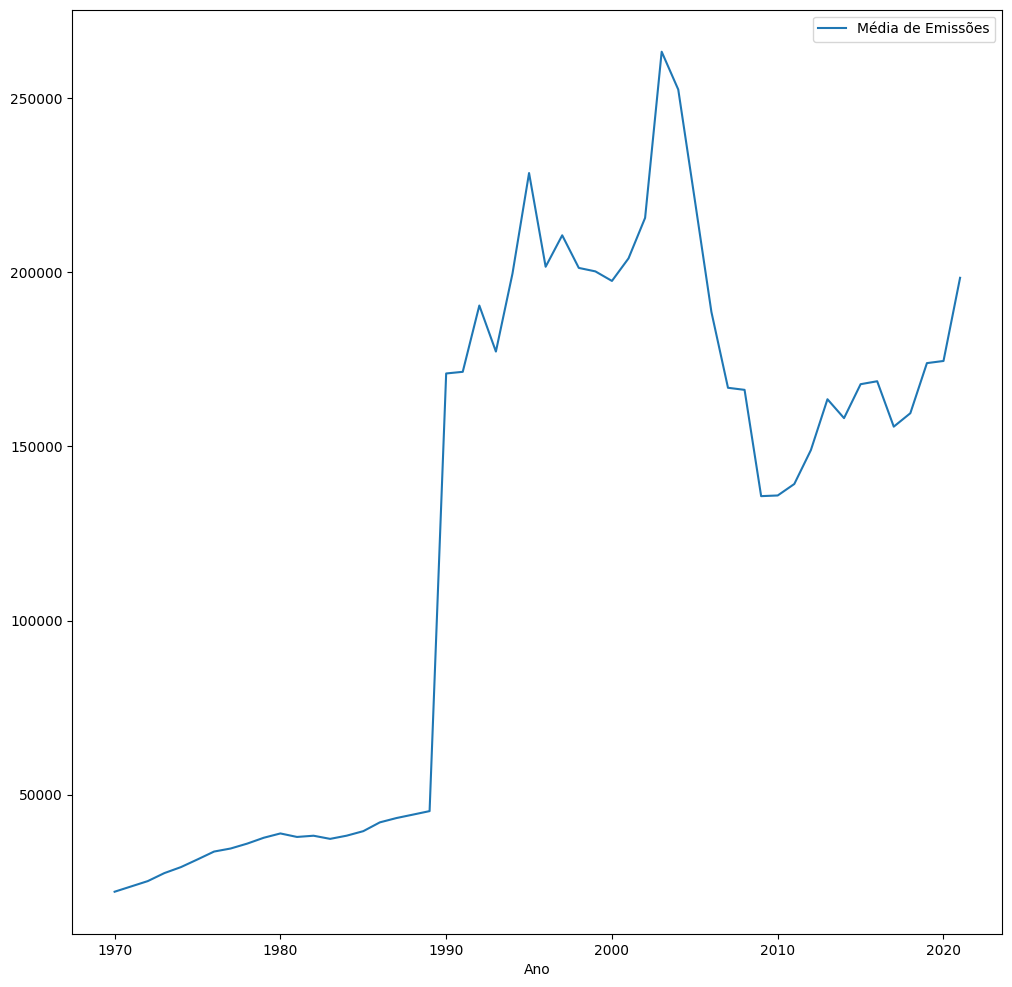

In [28]:
# Plotagem da média de emissões por ano:
df_grafico = emissao_ano.reset_index(drop=False)
df_grafico.plot(x='Ano', y='Média de Emissões', kind='line', figsize=(12,12))

In [29]:
# Identificando ano de pico de emissões
indice_ano_max = emissao_ano['Média de Emissões'].idxmax()
indice_ano_max

2003

In [30]:
emissao_ano.loc[indice_ano_max]

Média de Emissões          263347.006522
Diferença Bruta             47711.412288
Variação Percentual (%)        22.125945
Name: 2003, dtype: float64

In [31]:
# Calculando emissão média por ano e gás
emissoes_ano_gas = emissoes.groupby(['Ano', 'Gás'])[['Emissão']].mean()

emissoes_ano_gas

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [32]:
# Mudando formato para melhor plotagem
emissoes_ano_gas = emissoes_ano_gas.pivot_table(index='Ano', columns='Gás', values='Emissão')

emissoes_ano_gas

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


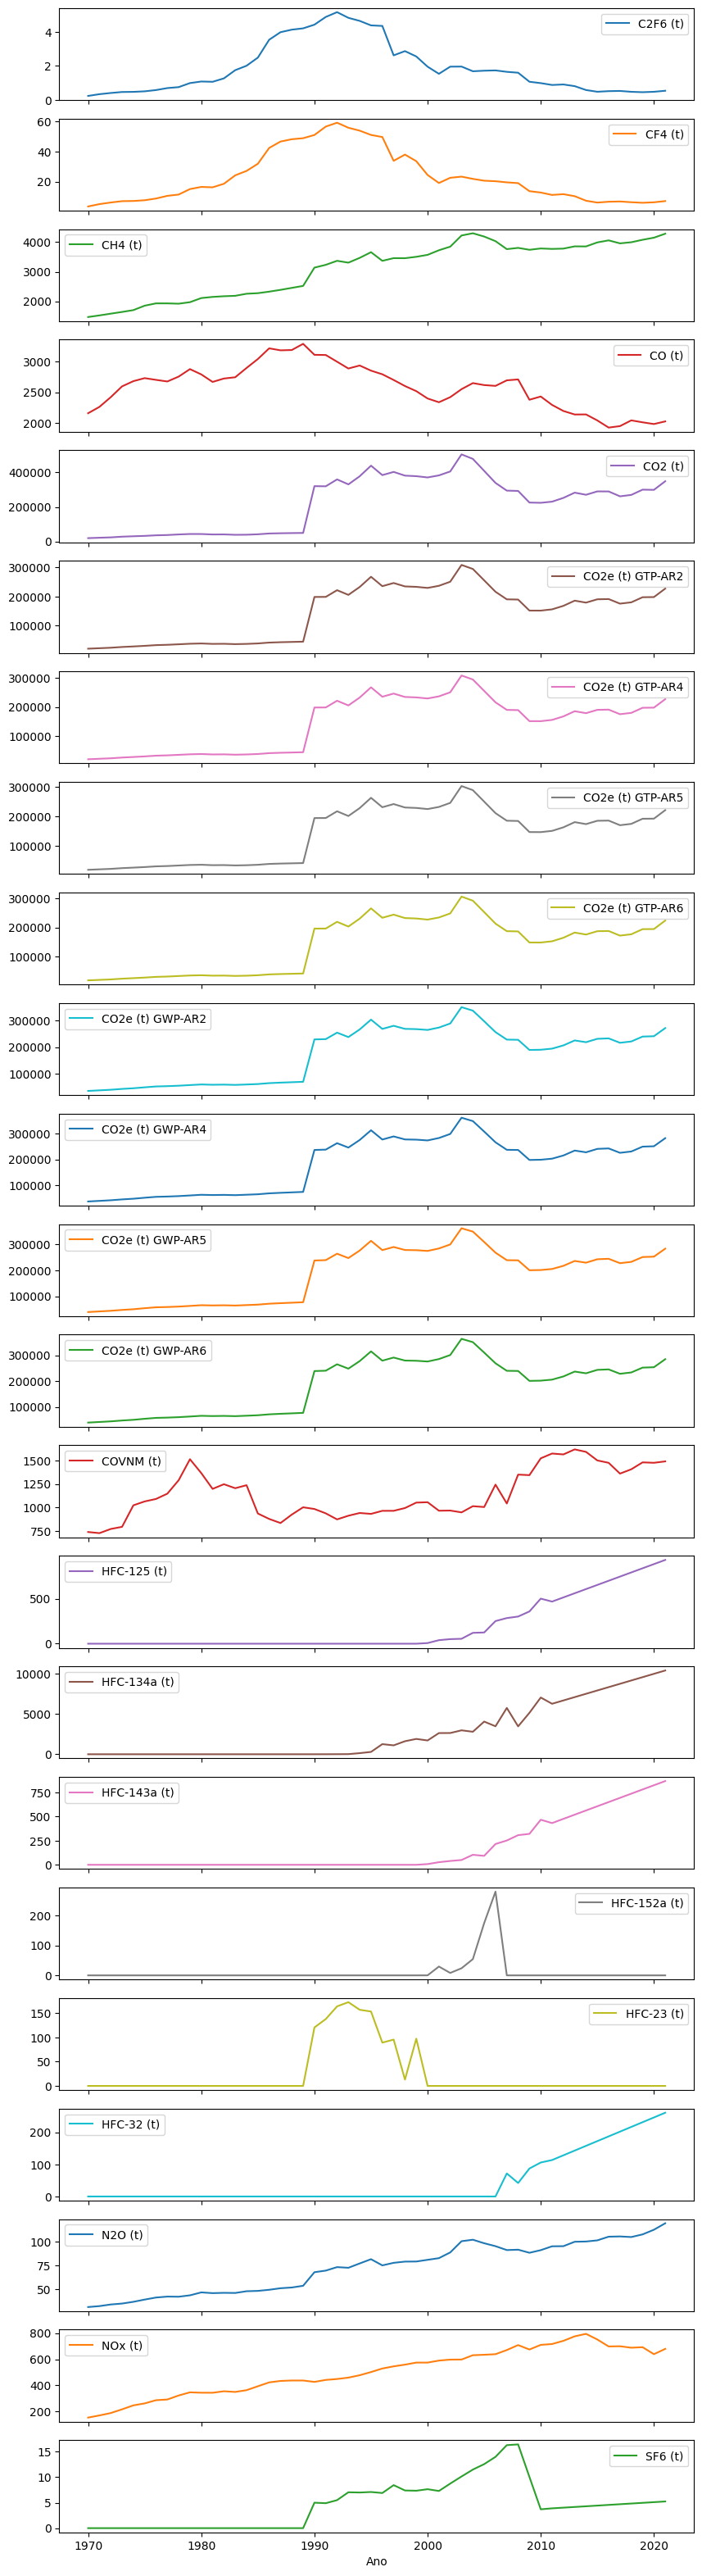

In [33]:
emissoes_ano_gas.plot(subplots=True, figsize=(10, 40));

### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [103]:
# Importando arquivo com cabeçalho de colunas na segunda linha e ignorando as últimas 34 linhas
dados_censo = pd.read_excel('POP2022_Municipios.xls', header=1, skipfooter=34)

dados_censo.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [104]:
dados_por_municipio = dados_censo.groupby('UF').sum(numeric_only=True)

dados_por_municipio

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [105]:
# Tentativa de conversão
dados_censo['POPULAÇÃO'].astype(int)

ValueError: invalid literal for int() with base 10: '461.748(1)'

In [106]:
# Conversão dificultada pela presença de valor com parênteses

# Dado este fato, devemos verificar a ocorrência destes valores na base de dados
dados_censo[dados_censo['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [107]:
# Criação de novas colunas para testagem de correção de valores
dados_censo = dados_censo.assign(
    POPULACAO_SEM_PARENTESIS=dados_censo['POPULAÇÃO'].replace(r'\(\d{1,2}\)', '', regex=True),
    POPULACAO_SEM_PONTO=lambda x: x['POPULACAO_SEM_PARENTESIS'].replace(r'\.', '', regex=True)
)

dados_censo[dados_censo['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,POPULACAO_SEM_PARENTESIS,POPULACAO_SEM_PONTO
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [108]:
# Extinção das colunas errôneas
dados_censo = dados_censo.drop(['POPULAÇÃO', 'POPULACAO_SEM_PARENTESIS'], axis=1)

In [110]:
# Realizando conversão de dados
dados_censo['POPULACAO_SEM_PONTO'] = dados_censo['POPULACAO_SEM_PONTO'].astype({'POPULACAO_SEM_PONTO':'int64'})
dados_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UF                   5570 non-null   object
 1   COD. UF              5570 non-null   int64 
 2   COD. MUNIC           5570 non-null   int64 
 3   NOME DO MUNICÍPIO    5570 non-null   object
 4   POPULACAO_SEM_PONTO  5570 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 217.7+ KB


In [111]:
# Renomeando coluna
dados_censo.rename(columns={'POPULACAO_SEM_PONTO':'POPULAÇÃO'}, inplace=True)

dados_censo.head(2)

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896


In [112]:
# Realizando agrupamento correto da população por unidade federativa
populacao_por_estado = dados_censo.groupby('UF')[['POPULAÇÃO']].sum()

populacao_por_estado

,POPULAÇÃO
UF,
AC,829780
AL,3125254
AM,3952262
AP,774268
BA,14659023
CE,8936431
DF,2923369
ES,3975100
GO,6950976


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.